In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
ds=pd.read_csv("car data.csv")
ds

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
ds.Car_Name.value_counts()


Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

C:\Users\manoj\AppData\Local\Temp\ipykernel_6392\2115109291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(ds.Selling_Price)


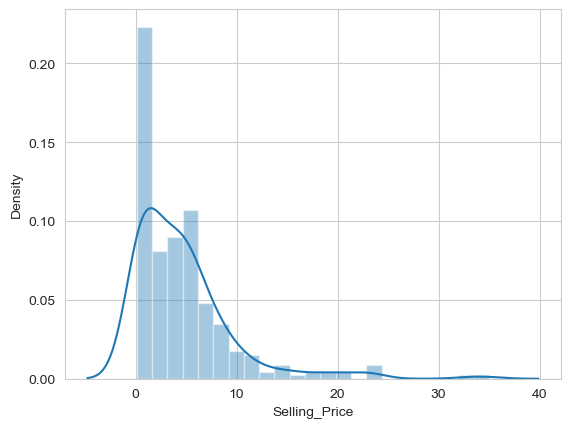

<Figure size 700x500 with 0 Axes>

In [6]:
sb.set_style("whitegrid")
sb.distplot(ds.Selling_Price)
plt.figure(figsize=(7, 5))
plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=vector, **plot_kwargs)
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will bec

<Figure size 900x900 with 0 Axes>

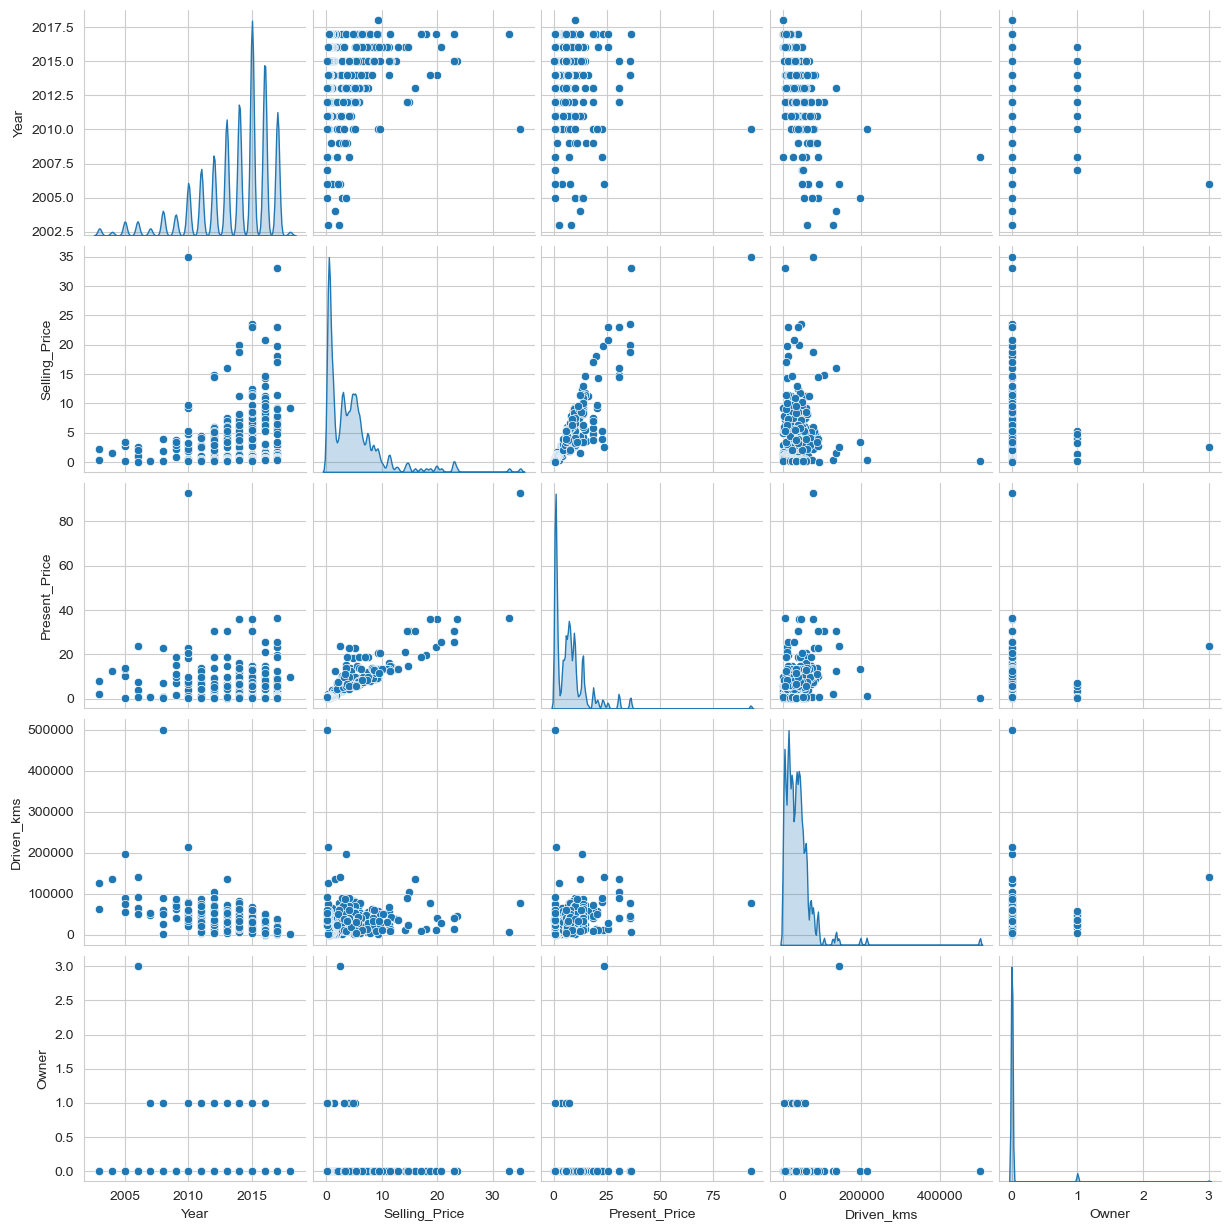

In [15]:
plt.figure(figsize=(9,9))
sb.pairplot(ds,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

In [21]:
x=ds.drop(['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'],axis=1)
x

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [23]:
y=ds['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=39)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(x_train)
y_pred

array([ 4.  ,  2.1 ,  2.85,  8.4 ,  2.  ,  2.7 ,  5.25,  4.75,  0.2 ,
        7.25,  3.75, 17.  ,  1.11,  0.12,  0.55,  2.95,  3.  ,  3.35,
        8.25,  5.5 ,  9.7 ,  5.85,  0.42,  6.  ,  3.9 ,  4.5 ,  1.05,
        2.35,  1.75,  2.65,  5.25,  4.  ,  7.5 ,  5.5 ,  4.75,  5.9 ,
        3.25,  7.45,  4.  ,  4.5 , 14.25,  1.05,  6.7 ,  3.49,  4.65,
        0.6 ,  5.11,  0.6 ,  2.9 ,  0.4 ,  7.5 ,  5.65,  0.6 ,  3.95,
        1.  ,  2.55,  3.95, 33.  ,  2.55,  1.35])

In [41]:
from sklearn import metrics
error=metrics.r2_score(y_train,y_pred)
print(error)

1.0


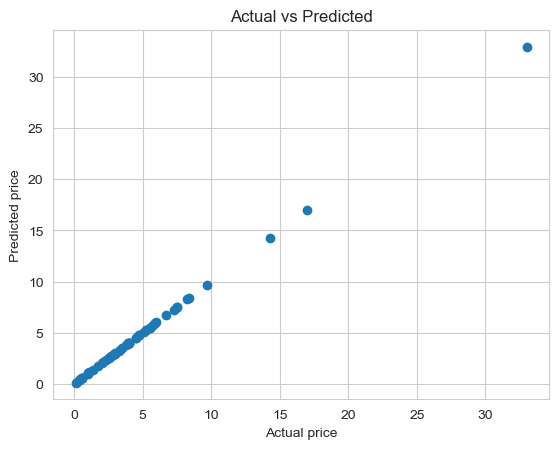

In [43]:
plt.scatter(y_train,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

In [45]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model1.fit(x_train, y_train)

Lasso()

In [47]:
y_pred1 = model1.predict(x_train)
y_pred1

array([ 4.02631712,  2.20696635,  2.92513113,  8.23955047,  2.11121105,
        2.78149817,  5.22325841,  4.74448189,  0.38761559,  7.13836448,
        3.78692886, 16.47450656,  1.25898885,  0.31101135,  0.72275915,
        3.02088643,  3.06876408,  3.40390765,  8.09591751,  5.46264667,
        9.48436941,  5.79779023,  0.59827726,  5.94142319,  3.93056182,
        4.50509364,  1.20153567,  2.44635461,  1.87182279,  2.73362052,
        5.22325841,  4.02631712,  7.37775274,  5.46264667,  4.74448189,
        5.84566788,  3.30815234,  7.32987509,  4.02631712,  4.50509364,
       13.84123572,  1.20153567,  6.61171031,  3.53796507,  4.64872659,
        0.7706368 ,  5.08920099,  0.7706368 ,  2.97300878,  0.5791262 ,
        7.37775274,  5.60627963,  0.7706368 ,  3.97843947,  1.15365802,
        2.63786522,  3.97843947, 31.79535511,  2.63786522,  1.48880158])

In [53]:
error= metrics.r2_score(y_train, y_pred1)
print("Error square: ", error)

Error square:  0.9981982551028732


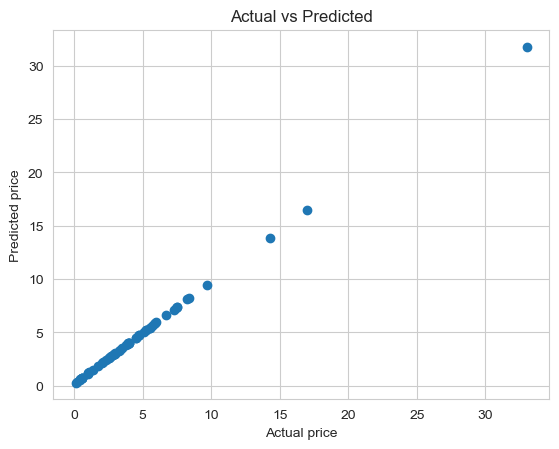

In [55]:
plt.scatter(y_train, y_pred1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()